***

# About Notebook
<p style='text-align: justify;'>The work of EDA (Exploratory Data Analysis) is essential in any data analysis study. This is because, before any type of modeling or inference is performed, it is necessary to deeply understand the data that will be used. EDA allows the researcher to get to know the characteristics of the data, such as its distribution, correlation between variables, presence of outliers, among other relevant aspects. With this information in hand, it is possible to make more accurate choices about the type of model to be used, necessary pre-processing, variable selection, and so on. </p>

<p style='text-align: justify;'>In addition, EDA can help identify data quality issues, such as inconsistencies, missing values, or measurement errors. By detecting these issues, they can be corrected, thus improving the quality of the analysis as a whole. </p>

<p style='text-align: justify;'>The main objective of this notebook is to apply the process of EDA, which records the salaries of professionals in the data career, interpreting them to present based on numbers and data.</p>

## EDA Steps
Example of steps in Exploratory Data Analysis

![EDA Steps](https://www.researchgate.net/publication/329930775/figure/fig3/AS:873046667710469@1585161954284/The-fundamental-steps-of-the-exploratory-data-analysis-process.png)

## About [ai-jobs.net](https://ai-jobs.net/)

<p style='text-align: justify;'> This site collects salary information anonymously from professionals all over the world in the AI/ML/Data Science space and makes it publicly available for anyone to use, share and play around with. </p>

<p style='text-align: justify;'> The primary goal is to have data that can provide better guidance in regards to what's being paid globally. So newbies, experienced pros, hiring managers, recruiters and also startup founders or people wanting to make a career switch can make better informed decisions. </p>

***

# Installing Packages

In [262]:
!pip install numpy
!pip install pandas
!pip install scipy
!pip install statsmodels
!pip install scikit-learn

!pip install plotly
!pip install matplotlib
!pip install nbformat

!pip install pycountry
!pip install pycountry-convert
!pip install wordcloud


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip



# Libraries

In [263]:
# Libraries for data manipulation
import pandas as pd
import numpy as np

# Libraries for data analysis
from scipy.stats import gaussian_kde
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
import statsmodels.api as sm

# Libraries for machine learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# Libraries for data visualization
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.colors as colors
import matplotlib.colors as mcolors
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# External libraries
import pycountry as pyc
import pycountry_convert as pc

# Default Libraries
import itertools
import re

# Load data
The dataset is provided via a web request, so every time this notebook is executed, the data is updated.

In [264]:
dataset_link = "https://ai-jobs.net/salaries/download/salaries.csv"
df = pd.read_csv(dataset_link)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,EX,FT,Applied Machine Learning Engineer,225000,USD,225000,US,100,US,M
1,2023,SE,FT,Analytics Engineer,50000,USD,50000,NG,100,NG,S
2,2023,SE,FT,Data Engineer,161800,USD,161800,US,0,US,M
3,2023,SE,FT,Data Engineer,121400,USD,121400,US,0,US,M
4,2023,SE,FT,Research Scientist,285000,USD,285000,US,0,US,M


# Data Information

In [265]:
# attributes
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

The attributes will be explained individually in the chapter on univariate analysis.

In [266]:
# concise summary of a dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840 entries, 0 to 3839
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3840 non-null   int64 
 1   experience_level    3840 non-null   object
 2   employment_type     3840 non-null   object
 3   job_title           3840 non-null   object
 4   salary              3840 non-null   int64 
 5   salary_currency     3840 non-null   object
 6   salary_in_usd       3840 non-null   int64 
 7   employee_residence  3840 non-null   object
 8   remote_ratio        3840 non-null   int64 
 9   company_location    3840 non-null   object
 10  company_size        3840 non-null   object
dtypes: int64(4), object(7)
memory usage: 330.1+ KB


We can notice that we have both categorical and numerical variables in this dataframe. We will separate the analyses for both cases.

<div style="display: flex; justify-content: center;">
    <table>
        <thead>
            <tr>
                <th>Categorical Attributes</th>
                <th>Numerical Attributes</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>experience_level</td>
                <td>work_year</td>
            </tr>
            <tr>
                <td>employment_type</td>
                <td>salary</td>
            </tr>
            <tr>
                <td>job_title</td>
                <td>salary_in_usd</td>
            </tr>
            <tr>
                <td>employee_residence</td>
                <td>remote_ratio</td>
            </tr>
            <tr>
                <td>company_location</td>
                <td> </td>
            </tr>
            <tr>
                <td>company_size</td>
                <td> </td>
            </tr>
            <tr>
                <td>salary_currency</td>
                <td> </td>
            </tr>
        </tbody>
    </table>
</div>


In [267]:
# dimensionality of the DataFrame
df.shape

(3840, 11)

The number of instances of the dataframe may vary according to the execution of the code

In [268]:
# checking for null values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [269]:
# Categorical attributes [object]
categorical_df = df.loc[
    :,
    [
        "experience_level",
        "employment_type",
        "job_title",
        "salary_currency",
        "employee_residence",
        "company_location",
        "company_size",
    ],
]

# Numerical Attributes [int64]
numerical_df = df.loc[:, ["work_year", "salary", "salary_in_usd", "remote_ratio"]]

In [270]:
# descriptive statistics
numerical_df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3840.000000,3.840000e+03,3840.000000,3840.000000
mean,2022.387500,1.901197e+05,137932.063802,46.080729
std,0.689934,6.643422e+05,63186.670871,48.589147
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.387500e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


Insights:
 - The database contains records of salaries for professionals in the data career;
 - Attributes work_year and remote_ratio are examples of discrete nominal attributes;
 - The database contains records dating back to 2020;
 - 75% of professionals who work in data career receive up to $175,000 per year;
 - Employers offer different forms of work for professionals in the data career.

# Univariate Analysis
Describe and analyze a single variable to obtain important information about it.

## Categorical Attributes

### experience_level: The experience level in the job during the year

In [271]:
# experience levels
df["experience_level"].unique()

array(['EX', 'SE', 'MI', 'EN'], dtype=object)

 - EN Entry-level / Junior
 - MI Mid-level / Intermediate
 - SE Senior-level / Expert
 - EX Executive-level / Director

In [272]:
df["experience_level"].value_counts(normalize=True)

experience_level
SE    0.671094
MI    0.215104
EN    0.083333
EX    0.030469
Name: proportion, dtype: float64

In [273]:

# Replace abbreviations in "experience_level" column with full words
data = df["experience_level"].replace(
    {"SE": "Senior", "MI": "Mid-level", "EN": "Junior", "EX": "Executive"}
)

# Get counts of unique values in "data"
unique_values = data.value_counts()

# Get frequency of values and the corresponding labels
freq = unique_values.values
labels = unique_values.index.values

# Get sum of total experience levels
total = sum(freq)

# Create the annotation with the total value
annotation = dict(font=dict(size=20), showarrow=False, text=str(total), x=0.5, y=0.5)

# Create the annotation with the total value
data = [
    go.Pie(
        labels=labels,
        values=freq,
        hole=0.5,
        marker=dict(colors=list(reversed(colors.sequential.Greys))),
        textinfo="percent+label",
        insidetextorientation="auto",
        hoverinfo="label+value",
    )
]

# Create the layout of the graph
layout = go.Layout(
    title={
        "text": "Level of experience of professionals in the data career",
        "x": 0.5,
        # "xanchor": "center",
    },
    # width=700,
    # height=700,
    annotations=[annotation],
)

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Show the graph
fig.show()

Many professionals who register their salaries on the platform are seniors

### employment_type: The type of employement for the role

In [274]:
# employment type
df["employment_type"].unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

 - PT: Part-time
 - FT: Full-time
 - CT: Contract
 - FL: Freelance

In [275]:
df["employment_type"].value_counts(normalize=True)

employment_type
FT    0.990365
PT    0.004427
CT    0.002604
FL    0.002604
Name: proportion, dtype: float64

Most professionals in the data field work under the full-time hiring modality. However, we can notice an extremely concentrated distribution in this modality, so we will include other hiring modalities to improve visualization.

In [276]:
# Replace abbreviations with full employment type names
data = df["employment_type"].replace(
    {"PT": "Part-time", "FT": "Full-time", "CT": "Contract", "FL": "Freelance"}
)

# Get counts of unique values
unique_values = data.value_counts()

# Get the label and value of the top employment type
top_labels = unique_values.index.values[:1].tolist()
top_values = unique_values.values[:1].tolist()

# Get the sum of total jobs registered
total = sum(unique_values.values)

# Get the sum of other jobs
others = sum(unique_values.values[1:])

# Create a dictionary with labels and values for top employment type and others
values = top_values + [others]
labels = top_labels + ["Others"]
data_dict = dict(zip(labels, values))

# Sort the dictionary by values in descending order
data_dict_ordered = dict(
    sorted(data_dict.items(), key=lambda item: item[1], reverse=True)
)


# Create annotation with total value
annotation = dict(font=dict(size=20), showarrow=False, text=str(total), x=0.5, y=0.5)

# Create a pie chart
data = [
    go.Pie(
        labels=list(data_dict_ordered.keys()),
        values=list(data_dict_ordered.values()),
        hole=0.5,
        marker=dict(colors=list(reversed(colors.sequential.Greys))),
        textinfo="percent+label",
        insidetextorientation="auto",
        hoverinfo="label+value",
    )
]

# Create layout for the chart
layout = go.Layout(
    title={
        "text": "Type of employment for data professionals",
        "x": 0.5,
        # "xanchor": "right",
    },
    # width=700,
    # height=900,
    annotations=[annotation],
)

# Create layout for the chart
fig = go.Figure(data=data, layout=layout)

# Show graph
fig.show()

The professionals who report their salaries work full-time

### job_title: The role worked in during the year.

In [277]:
df["job_title"].value_counts()

job_title
Data Engineer                          1060
Data Scientist                          856
Data Analyst                            620
Machine Learning Engineer               299
Analytics Engineer                      112
                                       ... 
Data Management Specialist                1
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Finance Data Analyst                      1
Name: count, Length: 94, dtype: int64

There are numerous job titles for data professionals. At this point, we could adopt a technique to categorize these titles into groups, but that will be for the feature engineering chapter. For simplicity, we will analyze only the titles with the highest occurrence.

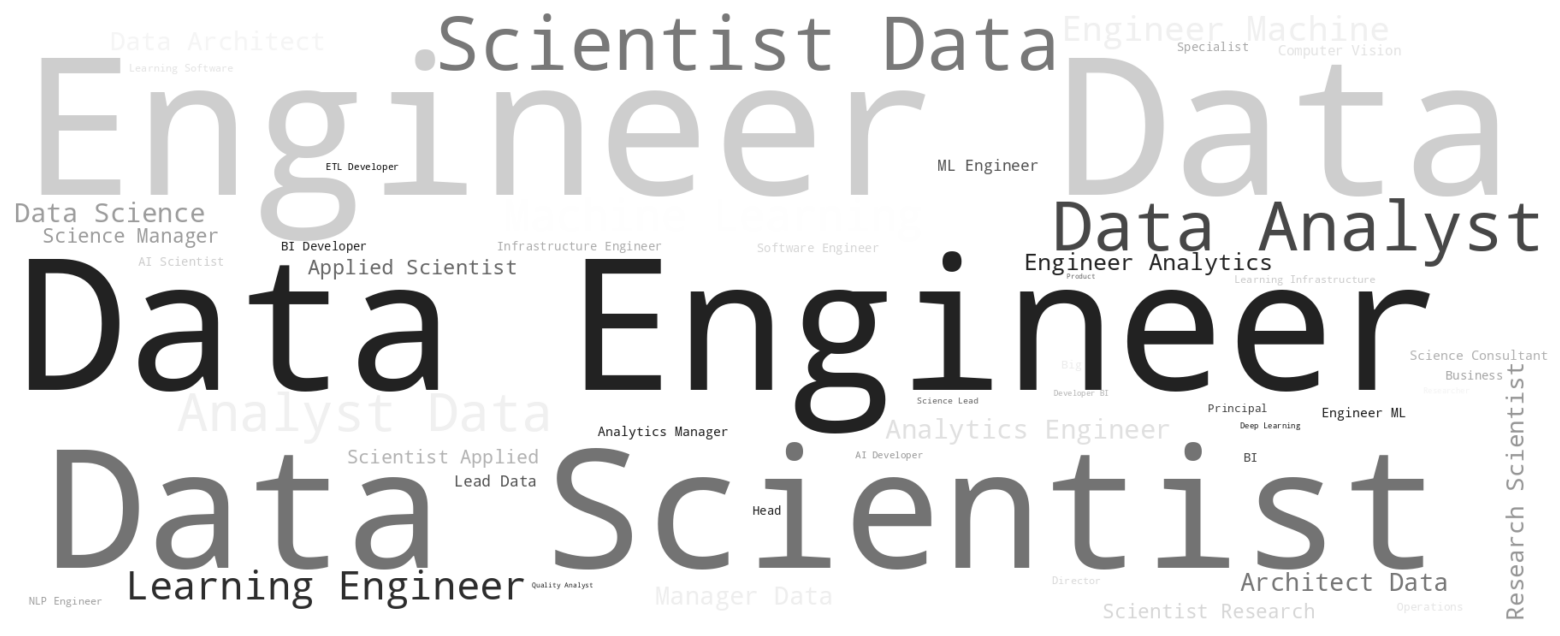

In [278]:
# Creates a color palette
cmap = mcolors.LinearSegmentedColormap.from_list(
    "black_to_white", ["#000000", "#ffffff"]
)

# Creates a color palette
words = df["job_title"].values

# Create a WordCloud object with the words array and the custom color palette
cloud_words = WordCloud(
    background_color="white", width=1800, height=720, colormap=cmap, max_words=50
).generate(" ".join(words))

# Create the plot
fig, ax = plt.subplots(figsize=(22, 8))
ax.imshow(cloud_words, interpolation="bilinear")
ax.axis("off")
plt.show()

In [279]:
# Count the number of occurrences of each job title in the dataset and sort them in descending order
jobs_title = df["job_title"].value_counts().sort_values(ascending=False)

# Get the top 5 job titles with the highest number of occurrences
top_jobs_labels = jobs_title.index.values[:5].tolist()
top_jobs_values = jobs_title.values[:5].tolist()

# Get the total number of job titles registered in the dataset
total = sum(jobs_title.values)

# Get the number of job titles that are not among the top 5
others = sum(jobs_title.values[5:])

# Combine the values for the top 5 job titles and the "Others" category
jobs_values = top_jobs_values + [others]
jobs_labels = top_jobs_labels + ["Others"]

# Create a dictionary that maps job titles to their corresponding values
jobs = dict(zip(jobs_labels, jobs_values))

# Sort the dictionary by value in descending order
jobs_ordered = dict(sorted(jobs.items(), key=lambda item: item[1], reverse=True))

# Create a Pie object for the donut chart
data = [
    go.Pie(
        labels=list(jobs_ordered.keys()),
        values=list(jobs_ordered.values()),
        hole=0.5,
        marker=dict(colors=list(reversed(colors.sequential.Greys))),
        textinfo="percent+label",
        insidetextorientation="auto",
        hoverinfo="label+value",
    )
]

# Create an annotation with the total number of job titles
annotation = dict(font=dict(size=20), showarrow=False, text=str(total), x=0.5, y=0.5)

# Create the layout for the chart
layout = go.Layout(
    title={
        "text": "Top jobs of professionals in the data career",
        "x": 0.5,
        #'xanchor': 'center'
    },
    # width=700,
    # height=700,
    annotations=[annotation],
)

# Create the figure for the chart
fig = go.Figure(data=data, layout=layout)

# Display the chart
fig.show()

### employee_residence

In [280]:
df["employee_residence"].value_counts(normalize=True).sort_values(ascending=False)[0:10]

employee_residence
US    0.799740
GB    0.045833
CA    0.022656
ES    0.021875
IN    0.018229
DE    0.012500
FR    0.009896
PT    0.004687
BR    0.004687
GR    0.004167
Name: proportion, dtype: float64

In [281]:
def country_to_continent(country_code):
    if not isinstance(country_code, str) or len(country_code) != 2:
        raise ValueError(
            "Input inválido. O código de país deve ser uma string com dois caracteres."
        )
    country_alpha2 = country_code
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    return country_continent_code


def categorize_country(country_code):
    try:
        return pyc.countries.get(alpha_2=country_code).alpha_3
    except:
        return "Unknown"

In [282]:
# create the dictionary of acronyms and full names
continentes = {
    "NA": "North America",
    "EU": "Europe",
    "AS": "Asia",
    "SA": "South America",
    "AF": "Africa",
    "OC": "Oceania",
}

# Apply the function to map countries to continents, then count the occurrences of each continent
# Normalize the values and sort them in descending order, then replace the continent acronyms with their full names
df["employee_residence"].apply(country_to_continent).value_counts(
    normalize=True
).sort_values(ascending=False).rename(index=continentes)

employee_residence
North America    0.827083
Europe           0.124740
Asia             0.031250
South America    0.008594
Africa           0.004687
Oceania          0.003646
Name: proportion, dtype: float64

In [283]:
data = (
    df["employee_residence"]
    .apply(country_to_continent)
    .value_counts()
    .sort_values(ascending=False)
)


data.rename(continentes, inplace=True)

# counts of unique values
unique_values = data.value_counts()

# frequency of values and the labels
freq = data.values
labels = data.index.values

# sum of total experience levels
total = sum(freq)

# Create annotation with total value
annotation = dict(font=dict(size=20), showarrow=False, text=str(total), x=0.5, y=0.5)

# Create pie chart with labels, values, hole in the center, color scheme, and text information
data = [
    go.Pie(
        labels=labels,
        values=freq,
        hole=0.5,
        marker=dict(colors=list(reversed(colors.sequential.Greys))),
        textinfo="percent+label",
        insidetextorientation="auto",
        hoverinfo="label+value",
    )
]

# Define layout of the chart
layout = go.Layout(
    title={
        "text": "Residance of professionals in the data career",
        "x": 0.5,
        # "xanchor": "center",
    },
    # width=700,
    # height=700,
    annotations=[annotation],
)

# Add title to the chart and display it
fig = go.Figure(data=data, layout=layout)
fig.show()

In [284]:
df["employee_residence"].apply(categorize_country).value_counts(
    normalize=True
).sort_values(ascending=False)

employee_residence
USA    0.799740
GBR    0.045833
CAN    0.022656
ESP    0.021875
IND    0.018229
         ...   
ZAF    0.000260
TUN    0.000260
HND    0.000260
EST    0.000260
MLT    0.000260
Name: proportion, Length: 79, dtype: float64

In [285]:
# Apply a custom function to a column of a pandas DataFrame to categorize countries
# based on their continent, and get the top 10 most common categories
residence = (
    df["employee_residence"]
    .apply(categorize_country)
    .value_counts()
    .sort_values(ascending=False)
)[0:10]

# Create a bar chart using plotly
data = [
    go.Bar(
        x=residence.index,
        y=residence.values,
        marker=dict(color=list(reversed(colors.sequential.Greys))),
        text=residence.values,
        textposition="auto",
    )
]

# Define the layout of the plot
layout = go.Layout(
    title={"text": "Top 10 employee locations", "x": 0.5},
    plot_bgcolor="white",
    paper_bgcolor="white",
    xaxis=dict(title="Country"),
    yaxis=dict(title="Quantity of Employees"),
)

# Create the plot
fig = go.Figure(data=data, layout=layout)

# Show the plot
fig.show()

### company_location: The country of the employer's main office or contracting branch

In [286]:
df["company_location"].value_counts(normalize=True)

company_location
US    0.809115
GB    0.047135
CA    0.023177
ES    0.021094
IN    0.014844
        ...   
BA    0.000260
AM    0.000260
VN    0.000260
ZA    0.000260
MT    0.000260
Name: proportion, Length: 73, dtype: float64

In [287]:
# Apply a custom function to a column of a pandas DataFrame to categorize countries
# based on their continent, and get the top 10 most common categories
company_location = (
    df["company_location"]
    .apply(categorize_country)
    .value_counts()
    .sort_values(ascending=False)
)[0:10]

# Create a bar chart using plotly
data = [
    go.Bar(
        x=company_location.index,
        y=company_location.values,
        marker=dict(color=list(reversed(colors.sequential.Greys))),
        text=company_location.values,
        textposition="auto",
    )
]

# Define the layout of the plot
layout = go.Layout(
    title={"text": "Top 10 company locations", "x": 0.5},
    plot_bgcolor="white",
    paper_bgcolor="white",
    xaxis=dict(title="Country"),
    yaxis=dict(title="Quantity of Companies"),
)

# Create the plot
fig = go.Figure(data=data, layout=layout)

# Show the plot
fig.show()

Companies and employees are extremely concentrated in the united states

### company_size: The average number of people that worked for the company during the year

In [288]:
df["company_size"].unique()

array(['M', 'S', 'L'], dtype=object)

- S less than 50 employees (small)
- M 50 to 250 employees (medium)
- L more than 250 employees (large)

In [289]:
df["company_size"].value_counts(normalize=True)

company_size
M    0.841667
L    0.119271
S    0.039062
Name: proportion, dtype: float64

In [290]:
# Replace abbreviations with full names in a specific column of a pandas DataFrame
data = df["company_size"].replace(
    {"S": "Small company", "M": "Medium company", "L": "Large company"}
)

# Get the counts of unique values in the column
unique_values = data.value_counts()

# Extract the frequency of each value and its label
freq = unique_values.values
labels = unique_values.index.values

# Define a dictionary that maps continent abbreviations to full names
continentes = {
    "NA": "North America",
    "EU": "Europe",
    "AS": "Asia",
    "SA": "South America",
    "AF": "Africa",
    "OC": "Oceania",
}

# Calculate the total frequency across all values
total = sum(freq)

# Define an annotation to display the total frequency on the plot
annotation = dict(font=dict(size=20), showarrow=False, text=str(total), x=0.5, y=0.5)

# Create a pie chart using plotly
data = [
    go.Pie(
        labels=labels,
        values=freq,
        hole=0.5,
        marker=dict(colors=list(reversed(colors.sequential.Greys))),
        textinfo="percent+label",
        insidetextorientation="auto",
        hoverinfo="label+value",
    )
]

# Define the layout of the plot
layout = go.Layout(
    title={
        "text": "Size of companies with professionals in the data career",
        "x": 0.5,
    },
    annotations=[
        {
            "text": "Small company: fewer than 50 employees<br>"
            "Medium company: between 50 and 250 employees<br>"
            "Large company: more than 250 employees",
            "showarrow": False,
            "x": 1.15,
            "y": 0.03,
            "xref": "paper",
            "yref": "paper",
            "align": "right",
        },
        dict(font=dict(size=20), showarrow=False, text=str(total), x=0.5, y=0.5),
    ],
)

# Create the plot
fig = go.Figure(data=data, layout=layout)

# Show the plot
fig.show()

### salaray_currency: The currency of the salary paid

In [291]:
df["salary_currency"].value_counts(normalize=True)

salary_currency
USD    0.857812
EUR    0.063281
GBP    0.043490
INR    0.015625
CAD    0.006510
AUD    0.002344
SGD    0.001563
BRL    0.001563
PLN    0.001302
CHF    0.001042
DKK    0.000781
TRY    0.000781
JPY    0.000781
HUF    0.000781
THB    0.000521
MXN    0.000260
ILS    0.000260
CZK    0.000260
HKD    0.000260
ZAR    0.000260
PHP    0.000260
CLP    0.000260
Name: proportion, dtype: float64

The predominant payment currencies are the Dollar and the Euro.

In [292]:
salary_currency = df["salary_currency"].value_counts()

# top currency
top_currencies_labels = salary_currency.index.values[:2].tolist()
top_currencies_values = salary_currency.values[:2].tolist()

# sum of total jobs registered
total = sum(salary_currency.values)

# sum of other jobs
others = sum(salary_currency.values[2:])

currency_values = top_currencies_values + [others]
currency_labels = top_currencies_labels + ["Others"]

currencies = dict(zip(currency_labels, currency_values))

# Sort the dictionary by values in ascending order.
currencies_ordered = dict(
    sorted(currencies.items(), key=lambda item: item[1], reverse=True)
)

# Create a Pie object for the donut chart.
data = [
    go.Pie(
        labels=list(currencies_ordered.keys()),
        values=list(currencies_ordered.values()),
        hole=0.5,
        marker=dict(colors=list(reversed(colors.sequential.Greys))),
        textinfo="percent+label",
        insidetextorientation="auto",
        hoverinfo="label+value",
    )
]

# Create the annotation with the total value.
annotation = dict(font=dict(size=20), showarrow=False, text=str(total), x=0.5, y=0.5)

# Create the graph layout.
layout = go.Layout(
    title={
        "text": "Top currencies of professionals in the data career",
        "x": 0.5,
        "xanchor": "center",
    },
    # width=600,
    # height=600,
    annotations=[annotation],
)

# Create the chart figure.
fig = go.Figure(data=data, layout=layout)

fig.show()

## Numerical Attributes

### work_year: The year of the salary was paid

In [293]:
# description of frequency work_year attribute
work_year = df["work_year"].value_counts().sort_index()

# The Years of salary was paid
years = work_year.index.values

# Sample
quantity_of_employeements = work_year.values

# Growth percentage array
growth_percentage = (
    100 * (np.diff(quantity_of_employeements)) / quantity_of_employeements[:-1]
)

growth_percentage = np.concatenate(([0], growth_percentage))


# Create a figure with layout configuration
fig = make_subplots(rows=1, cols=2)

# Quantity bar graph
fig.add_trace(
    go.Bar(
        x=years,
        y=quantity_of_employeements,
        name="Quantity",
        text=quantity_of_employeements,
        textposition="auto",
    ),
    row=1,
    col=1,
)

# Growth scatter graph
fig.add_trace(
    go.Scatter(
        x=years,
        y=np.round(growth_percentage, 0),
        name="Growth",
        mode="lines+markers+text",
        text=np.char.mod("%.0f", growth_percentage),
        textposition="top center",
        textfont=dict(size=12),
        hoverinfo="y+text",
    ),
    row=1,
    col=2,
)

# Layout configuration
fig.update_layout(
    title="Salaries registered in <a href='https://ai-jobs.net'>ai-jobs.net</a> per Year",
    yaxis1_title="Quantity",
    yaxis2_title="Growth (%)",
    xaxis1=dict(
        title="Years",
        tickmode="linear",
        tickformat="%Y",
        dtick="M12",
    ),
    xaxis2=dict(
        title="Years",
        tickmode="linear",
        tickformat="%Y",
        dtick="M12",
    ),
)
fig.update_layout(template=None)

# Change color to black
fig.update_traces(marker=dict(color="black"))
# height=400, width=800)

fig.show()

<p style='text-align: justify;'> The highest number of records of professionals in the data career occurred in 2022 so far, but the difference between the current year and the previous one has been narrowing more and more, so we should have more salaries registered compared to last year. An exponential growth in salary records on the platform is observed, the data community is increasingly adopting the use of the platform, engaged in registering their salaries on it, thus the number of records keeps increasing. </p>

<p style='text-align: justify;'> Over time, ai-jobs.net can serve as a sample to analyze the demand curve for data professionals. At this moment, we cannot assume that the demand for data professionals is increasing, as the increase in 2022 may have been due to the platform's promotion in the community and not necessarily due to an increase in demand for professionals. </p>

### salary_in_usd: The salary in USD (FX rate divided by avg. USD rate of respective year via data from BIS).
While the attribute salary represents the value in local currency, the attribute salary_in_usd represents the converted value in US dollars. To facilitate analysis, we will adopt only the salary in US dollars.

In [294]:
# array of registered salary values
salary = df["salary_in_usd"].values

# Calculating the density curve
kde = gaussian_kde(salary)
x_kde = np.linspace(0, salary.max(), 100)
y_kde = kde.evaluate(x_kde)

# Creation of a figure object with subplots
fig = make_subplots(rows=1, cols=2)

# Adição do boxplot no primeiro subplot
fig.add_trace(go.Box(x=salary, name="Salary", marker_color="black"), row=1, col=1)

# Adding the density plot to the second subplot
fig.add_trace(go.Scatter(x=x_kde, y=y_kde, line=dict(color="black")), row=1, col=2)

# Customizing the figure layout
fig.update_layout(
    title="Salary of professionais in data carrer",
    xaxis1_title="Salary (USD)",
    yaxis2_title="Density",
    xaxis2_title="Salary (USD)",
    showlegend=False,
    template=None,
)


# Displaying the figure
fig.show()

<p style='text-align: justify;'>A distribution with positive skewness is a probability distribution where the right tail is longer than the left tail. This means that most of the values are concentrated on the left side of the graph, while a smaller number of values extend to the right. The mean is higher than the median and mode, indicating the presence of extreme values in the right tail of the distribution. </p>

<p style='text-align: justify;'>A common example of a distribution with positive skewness is the salary distribution, where a large number of people earn low salaries, while a smaller number of people earn very high salaries, pulling the mean upwards.</p>

### remote_ratio: The overall amount of work done remotely, possible values are as follows: 

In [295]:
df["remote_ratio"].unique()

array([100,   0,  50])

- 0: No remote work (less than 20%)
- 50: Partially remote
- 100: Fully remote (more than 80%)

In [296]:
df["remote_ratio"].value_counts(normalize=True)

remote_ratio
0      0.514323
100    0.435937
50     0.049740
Name: proportion, dtype: float64

In [297]:
data = df["remote_ratio"].replace(
    {0: "No remote work", 50: "Partially remote", 100: "Fully remote"}
)

# counts of unique values
unique_values = data.value_counts()

# frequency of values and the labels
freq = unique_values.values
labels = unique_values.index.values

# sum of total experience levels
total = sum(freq)

# Create annotation with the total value
annotation = dict(font=dict(size=20), showarrow=False, text=str(total), x=0.5, y=0.5)

# Create pie chart
data = [
    go.Pie(
        labels=labels,
        values=freq,
        hole=0.5,
        marker=dict(colors=list(reversed(colors.sequential.Greys))),
        textinfo="percent+label",
        insidetextorientation="auto",
        hoverinfo="label+value",
    )
]

# Create layout for the chart
layout = go.Layout(
    title={
        "text": "Tof professionals in the data career",
        "x": 0.5,
        # "xanchor": "center",
    },
    # width=700,
    # height=700,
    annotations=[annotation],
)

# Create figure with data and layout
fig = go.Figure(data=data, layout=layout)

# Show the chart
fig.show()

# Bivariate analysis

## Hypothesis class
Used to assess the plausibility of a hypothesis by using sample data

In [298]:
class HypothesisTest:
    def __init__(self, df) -> None:
        self._df = df

    def t_test(self, var1: str, var2: str, h0: str, alpha=0.05) -> dict:
        """
        Performs a t-test for two numerical variables in a DataFrame.

        Parameters:
        var1 (str): The name of the first numerical variable.
        var2 (str): The name of the second numerical variable.
        hypothesis (str): user's hypothesis in the form of a string, e.g. "The mean is equal to 5"
        alpha (float, optional): The desired significance level for the test. Defaults to 0.05.

        Returns:
        dict: A dictionary containing the following fields:
            - "t": The t-statistic calculated by the test.
            - "p_value": The p-value calculated by the test.
            - "conclusion": the result of the test, indicating whether the null hypothesis was rejected or not.
        """

        df = self._df

        # Calculates the t-statistic and p-value for the t-test
        t_stat, p_val = ttest_ind(df[var1], df[var2])

        # Determine conclusion
        if p_val < alpha:
            conclusion = f"Reject null hypothesis: {h0}"
        else:
            conclusion = f"Fail to reject null hypothesis: {h0}"

        # Returns a dictionary with the results of the test
        return {"t": t_stat, "p_value": p_val, "conclusion": conclusion}

    def chi_square_test(self, var1: str, var2: str, h0: str, alpha=0.05) -> dict:
        """
        Performs the chi-square test for two categorical variables of a DataFrame.

        Parameters:
            var1 (str): name of the first categorical variable.
            var2 (str): name of the second categorical variable.
            hypothesis (str): user's hypothesis in the form of a string, e.g. "The mean is equal to 5"
            alpha (float): desired significance level for the test (usually 0.05 or 0.01).

        Returns:
            A dictionary with the following fields:
            - "chi2": the calculated chi-square value.
            - "p_value": the p-value calculated by the test.
            - "conclusion": the result of the test, indicating whether the null hypothesis was rejected or not.
        """

        df = self._df

        # Creates a contingency table
        contingency_table = pd.crosstab(df[var1], df[var2])

        # Performs the chi-squared test
        chi2, p_val, _, _ = chi2_contingency(contingency_table)

        # Determine conclusion
        if p_val < alpha:
            conclusion = f"Reject null hypothesis: {h0}"
        else:
            conclusion = f"Fail to reject null hypothesis: {h0}"

        # Returns a dictionary with the results of the test
        return {"chi²": chi2, "p_value": p_val, "conclusion": conclusion}

## Categorical & Categorical

In [299]:
categorical_columns = categorical_df.columns.values

bivariate_categorical_combinations = list(
    itertools.combinations(categorical_columns, 2)
)

bivariate_categorical_combinations

[('experience_level', 'employment_type'),
 ('experience_level', 'job_title'),
 ('experience_level', 'salary_currency'),
 ('experience_level', 'employee_residence'),
 ('experience_level', 'company_location'),
 ('experience_level', 'company_size'),
 ('employment_type', 'job_title'),
 ('employment_type', 'salary_currency'),
 ('employment_type', 'employee_residence'),
 ('employment_type', 'company_location'),
 ('employment_type', 'company_size'),
 ('job_title', 'salary_currency'),
 ('job_title', 'employee_residence'),
 ('job_title', 'company_location'),
 ('job_title', 'company_size'),
 ('salary_currency', 'employee_residence'),
 ('salary_currency', 'company_location'),
 ('salary_currency', 'company_size'),
 ('employee_residence', 'company_location'),
 ('employee_residence', 'company_size'),
 ('company_location', 'company_size')]

<p style='text-align: justify;'>Attributes such as "salary_currency", "employment_type", "employee_residence" and "company_location" may be disregarded in pairwise analysis of categorical variables, as they exhibit a very dominant distribution, as seen in the univariate analysis. For example the dominant currency is the dollar and the majority of data professionals work full-time.</p>

<p style='text-align: justify;'>When the distribution of an attribute is dominant compared to other values, it may affect the pairwise analysis of categorical variables, as the variable may not exhibit sufficient variation to be considered relevant in the analysis. In the specific case of attributes salary_currency and employment_type, if they exhibit a very dominant distribution, it is possible that they may not bring much relevant information for the pairwise analysis of categorical variables.</p>

<p style='text-align: justify;'>It is important to remember that the decision to disregard an attribute or not depends on the context and objective of the analysis. In some cases, even if the distribution of an attribute is dominant, it may still bring relevant information for the analysis.</p>

In [300]:
# List of all categorical columns
categorical_columns = categorical_df.columns.values

# Remove specific columns
columns_to_exclude = [
    "salary_currency",
    "employment_type",
    "employee_residence",
    "company_location",
]
categorical_columns = [
    col for col in categorical_columns if col not in columns_to_exclude
]

# Create combinations
bivariate_categorical_combinations = list(
    itertools.combinations(categorical_columns, 2)
)

bivariate_categorical_combinations

[('experience_level', 'job_title'),
 ('experience_level', 'company_size'),
 ('job_title', 'company_size')]

Since the distribution of the job_title attribute is considerable, I will adopt only three categories: Data Engineer, Data Scientist, and Data Analyst.

## Experience level x Job Title

In [301]:
# Create a copy of the categorical dataframe
df_copy = categorical_df.copy()

# Select only rows where the job title is "Data Engineer", "Data Scientist", or "Data Analyst"
analysis = categorical_df.loc[
    categorical_df["job_title"].isin(
        ["Data Engineer", "Data Scientist", "Data Analyst"]
    )
]

# Replace experience level codes with their corresponding labels, group the data by job title and experience level,
# count the number of occurrences, and reset the index
grouped_data = (
    analysis.replace(
        {
            "SE": "Senior",
            "MI": "Intermediate",
            "EN": "Junior",
            "EX": "Executive",
        }
    )
    .groupby(["job_title", "experience_level"])["experience_level"]
    .count()
    .reset_index(name="count")
)

# Calculate the proportion of each experience level group within each job title
grouped_data["proportion"] = (
    grouped_data.groupby(["experience_level"])["count"].transform(lambda x: x / x.sum())
    * 100
)

# Define the order of the experience level categories
experience_levels = ["Junior", "Intermediate", "Senior", "Executive"]

# Define the order of the job titles
job_roles = ["Data Analyst", "Data Engineer", "Data Scientist"]

# Sort the data by experience level, using the order defined above
grouped_data.sort_values(
    by="experience_level",
    key=lambda x: x.map({v: i for i, v in enumerate(experience_levels)}),
    inplace=True,
)

# Define a list of gray colors for each job title
gray_colors = {
    "Data Analyst": colors.sequential.Greys[8],
    "Data Engineer": colors.sequential.Greys[5],
    "Data Scientist": colors.sequential.Greys[2],
}

# Create a list of bar charts, one for each job title
traces = [
    go.Bar(
        x=experience_levels,
        y=grouped_data[(grouped_data["job_title"] == job_title)]["proportion"],
        name=job_title,
        marker=dict(color=gray_colors[job_title]),
        text=[
            f"{val:.1f}%"
            for val in grouped_data[grouped_data["job_title"] == job_title][
                "proportion"
            ]
        ],
    )
    for i, job_title in enumerate(job_roles)
]

# Define the layout of the chart
layout = go.Layout(
    title="Proportional Data Professionals Demand by Experience Level",
    xaxis=dict(title="Experience Level"),
    yaxis=dict(title="Prportional Percentage of Job Role (%)"),
    plot_bgcolor="white",
)

# Create the figure object and add the bar charts to it
fig = go.Figure(data=traces, layout=layout)

# Display the figure
fig.show()

## Company Size x Job Title

In [302]:
# Make a copy of the categorical_df DataFrame
df_copy = categorical_df.copy()

# Filter the DataFrame to include only job titles of interest
analysis = categorical_df.loc[
    categorical_df["job_title"].isin(
        ["Data Engineer", "Data Scientist", "Data Analyst"]
    )
]

# Group the data by job title and company size, count the values, and reset index
grouped_data = (
    analysis.groupby(["job_title", "company_size"])["company_size"]
    .count()
    .reset_index(name="count")
)

# Calculate the proportion of each company size group within each job title
grouped_data["proportion"] = (
    grouped_data.groupby(["company_size"])["count"].transform(lambda x: x / x.sum())
    * 100
)


grouped_data.sort_values(
    by="company_size",
    key=lambda x: x.map({v: i for i, v in enumerate(["S", "M", "L"])}),
    inplace=True,
)

# Create a new figure object
fig = go.Figure()

# Define a dictionary of gray colors for each company size category
gray_colors = {
    "Data Analyst": colors.sequential.Greys[8],
    "Data Engineer": colors.sequential.Greys[5],
    "Data Scientist": colors.sequential.Greys[2],
}


company_size = ["Small company", "Medium company", "Large company"]

traces = [
    go.Bar(
        x=company_size,
        y=grouped_data[(grouped_data["job_title"] == job_title)]["proportion"],
        name=job_title,
        marker=dict(color=gray_colors[job_title]),
        text=[
            f"{val:.1f}%"
            for val in grouped_data[grouped_data["job_title"] == job_title][
                "proportion"
            ]
        ],
    )
    for i, job_title in enumerate(["Data Analyst", "Data Engineer", "Data Scientist"])
]

# Create the layout for the chart
layout = go.Layout(
    title="Proportional Data Professionals Demand by Company Size",
    xaxis=dict(title="Company Size"),
    yaxis=dict(title="Proportional Percentage of Job Role (%)", range=[0, 100]),
    plot_bgcolor="white",
)

# Add the bar charts and layout to the figure object
fig = go.Figure(data=traces, layout=layout)

# Show the figure
fig.show()

Typically, a large company's business problem lies in generating value from their pre-structured data, which is why there tends to be a high demand for data engineers and a data scientists.

### Experience level x Company Size

In [303]:
# Group data by company size and experience level, count the values, and reset index
grouped_data = (
    df.groupby(["company_size", "experience_level"])["experience_level"]
    .count()
    .reset_index(name="count")
)

# Calculate the proportion of each experience level within each company size group
grouped_data["proportion"] = grouped_data.groupby(["company_size"])["count"].transform(
    lambda x: x / x.sum()
)

# Replace codes for company size and experience level with more descriptive names
grouped_data["company_size"].replace(
    {"L": "Large company", "M": "Medium company", "S": "Small company"}, inplace=True
)
grouped_data["experience_level"].replace(
    {"EN": "Junior", "MI": "Medium", "SE": "Senior", "EX": "Executive"}, inplace=True
)

# Define the desired order for the company size categories
cat_order = pd.CategoricalDtype(
    categories=["Small company", "Medium company", "Large company"], ordered=True
)

# Convert the "company_size" column to a categorical column with the defined order
grouped_data["company_size"] = grouped_data["company_size"].astype(cat_order)

# Sort the data by the "company_size" column
grouped_data = grouped_data.sort_values("company_size")


fig = go.Figure()


# Creating a list of gray colors for each employee_type
gray_colors = {
    "Executive": colors.sequential.Greys[2],
    "Senior": colors.sequential.Greys[4],
    "Medium": colors.sequential.Greys[6],
    "Junior": colors.sequential.Greys[8],
}

company_size = ["Small company", "Medium company", "Large company"]

traces = [
    go.Bar(
        x=company_size,
        y=grouped_data[(grouped_data["experience_level"] == experience_level)][
            "proportion"
        ]
        * 100,
        name=experience_level,
        marker=dict(color=gray_colors[experience_level]),
        text=[
            f"{val:.1f}%"
            for val in grouped_data[
                grouped_data["experience_level"] == experience_level
            ]["proportion"]
            * 100
        ],
    )
    for i, experience_level in enumerate(["Junior", "Medium", "Senior", "Executive"])
]

# Creating the layout of the graph
layout = go.Layout(
    title="Proportional Experience Level by Company Size",
    xaxis=dict(title="Company Size"),
    yaxis=dict(title="Proportional Percentage of Experience Level (%)", range=[0, 100]),
    plot_bgcolor="white",
)

# Adding the bars to the Figure object
fig = go.Figure(data=traces, layout=layout)

fig.show()

### Hypothesis test

The distribution of seniority levels among professionals does not differ significantly between companies of different sizes

In [304]:
hypothesis = HypothesisTest(categorical_df)

hypothesis.chi_square_test(
    "experience_level",
    "company_size",
    h0="The distribution of seniority levels among professionals does not differ significantly between companies of different sizes",
)

{'chi²': 337.9374008376081,
 'p_value': 5.991681761690814e-70,
 'conclusion': 'Reject null hypothesis: The distribution of seniority levels among professionals does not differ significantly between companies of different sizes'}

Strong evidence against the null hypothesis and suggests that the distribution of seniority levels among professionals differs between companies of different sizes.

## Numerical & Numerical

In [305]:
numerical_columns = numerical_df.columns.values

bivariate_numerical_combinations = list(
    itertools.combinations(numerical_columns, 2)
)

bivariate_numerical_combinations

[('work_year', 'salary'),
 ('work_year', 'salary_in_usd'),
 ('work_year', 'remote_ratio'),
 ('salary', 'salary_in_usd'),
 ('salary', 'remote_ratio'),
 ('salary_in_usd', 'remote_ratio')]

In [306]:
# List of all categorical columns
numerical_columns = numerical_df.columns.values

# Remove specific columns
columns_to_exclude = ["salary"]
numerical_columns = [
    col for col in numerical_columns if col not in columns_to_exclude
]

# Create combinations
bivariate_numerical_combinations = list(
    itertools.combinations(numerical_columns, 2)
)

bivariate_numerical_combinations

[('work_year', 'salary_in_usd'),
 ('work_year', 'remote_ratio'),
 ('salary_in_usd', 'remote_ratio')]

### Work Year x Remote Ratio

In [307]:
# Group data by work year and remote work ratio, and count the number of instances
grouped_data = (
    df.groupby(["work_year", "remote_ratio"])["remote_ratio"]
    .count()
    .reset_index(name="count")
)

# Calculate the proportion of each remote work ratio for each work year
grouped_data["proportion"] = (
    grouped_data.groupby(["work_year"])["count"].transform(lambda x: x / x.sum()) * 100
)

# Round the proportion to 1 decimal place
grouped_data["proportion"] = grouped_data["proportion"].round(1)

# Replace the numeric values of remote work ratio with strings for better visualization
grouped_data["remote_ratio"].replace(
    {0: "In-Office", 50: "Hybrid", 100: "Remote"}, inplace=True
)

# Creating a list of gray colors for each employee_type
gray_colors = {
    "In-Office": colors.sequential.Greys[8],
    "Hybrid": colors.sequential.Greys[5],
    "Remote": colors.sequential.Greys[2],
}

# Creating the bars
traces = [
    go.Bar(
        x=grouped_data[grouped_data["remote_ratio"] == employee_type]["work_year"],
        y=grouped_data[grouped_data["remote_ratio"] == employee_type]["proportion"],
        name=employee_type,
        marker=dict(color=gray_colors[employee_type]),
        text=[
            f"{val:.1f}%"
            for val in grouped_data[grouped_data["remote_ratio"] == employee_type][
                "proportion"
            ]
        ],
        textposition="auto",
    )
    for i, employee_type in enumerate(["In-Office", "Hybrid", "Remote"])
]

# Creating the layout of the graph
layout = go.Layout(
    title="Proportional Work Models per Year",
    xaxis=dict(title="Year"),
    yaxis=dict(title="Proportional Percentage of Work Models (%)", range=[0, 100]),
    plot_bgcolor="white",
)

# Adding the bars to the Figure object
fig = go.Figure(data=traces, layout=layout)

fig.show()

The data suggests that in-office is becoming increasingly common, while remote work is becoming less prevalent. However, the data also suggests that the popularity of hybrid roles may be less consistent over time.

## Remote Ratio x Salary

In [308]:
data = numerical_df.loc[:, ["salary_in_usd", "remote_ratio"]]

data.drop(index=data.loc[data["remote_ratio"] == 50].index, inplace=True)

data.groupby("remote_ratio").quantile(0.95)


,salary_in_usd
remote_ratio,
0,250000.0
100,240000.0


The salary difference between remote and in-person positions for data professionals does not diverge significantly.

In [309]:
numerical_df.columns

Index(['work_year', 'salary', 'salary_in_usd', 'remote_ratio'], dtype='object')

## Numerical & Categorical

### Trend Salary per top Job Title

In [310]:
trend_salary = df.loc[
    df["job_title"].isin(["Data Engineer", "Data Scientist", "Data Analyst"])
]

trend_salary = trend_salary.loc[:, ["work_year", "job_title", "salary_in_usd"]]

# group by percentile and calculate the mean salary
grouped = trend_salary.groupby(["work_year", "job_title"]).quantile(0.95)

grouped.reset_index(inplace=True)

# Define reversed Greys color scale
color_scale = [
    colors.sequential.Greys[2],
    colors.sequential.Greys[5],
    colors.sequential.Greys[8],
]

# new figure
fig = go.Figure()

for i, job_title in enumerate(grouped["job_title"].unique()):
    data = grouped[grouped["job_title"] == job_title]
    fig.add_trace(
        go.Scatter(
            x=data["work_year"],
            y=data["salary_in_usd"],
            mode="lines+markers+text",
            name=job_title,
            text=data["salary_in_usd"].apply(lambda x: "{:,.0f}k".format(x / 1000)),
            textposition=["middle left", "bottom center", "top center", "middle right"],
            marker=dict(size=8),
            line_color=color_scale[i],
        )
    )

# Define x-axis limits and intervals
fig.update_layout(
    xaxis=dict(range=[2019.5, 2023.5], dtick=1),
    template=None,
    title="Salary Trends for Data Engineer, Data Scientist and Data Analyst",
    yaxis=dict(title="Salary in USD"),
    xaxis_title="Year",
    legend=dict(title="Job Title"),
)

# Display the plot
fig.show()

# Multivariate analysis
<p style='text-align: justify;'>Multivariate analysis is used to understand how various independent variables are related to the dependent variable, allowing us to predict or explain the value of the dependent variable based on the independent variables. The choice of the response variable depends on the analysis objectives and the nature of the data. Generally, the response variable is the variable of greatest interest and the one we want to explain or predict.</p>

In our case, the dependent variable will be the professional's salary in dollars in the data career. Do our independent attributes explain these records? Let's find out.

## Correlation analysis

In [311]:
# Make a copy of the original dataframe
df_copy = df.copy()

# Select categorical columns
categorical_columns = df_copy.select_dtypes(include=["object"]).columns

# Apply factorize to each categorical column
for column in categorical_columns:
    df_copy[column], _ = pd.factorize(df_copy[column])

# Compute the correlation matrix between all numerical features and "salary"
corr_matrix = df_copy.corr(method="spearman")["salary_in_usd"].sort_values(
    ascending=True
)

corr_matrix

employee_residence   -0.505681
company_location     -0.489579
salary_currency      -0.484802
experience_level     -0.456149
company_size         -0.207988
employment_type      -0.120853
job_title            -0.086688
remote_ratio         -0.060535
work_year             0.211768
salary                0.883448
salary_in_usd         1.000000
Name: salary_in_usd, dtype: float64

In [312]:
# Create bar plot
fig = go.Figure(
    go.Bar(
        x=corr_matrix.values,
        y=corr_matrix.index,
        orientation="h",
        marker=dict(
            color=corr_matrix.values,
            colorscale="Greys",
            colorbar=dict(title="Correlation"),
            cmin=-1,
            cmax=1,
        ),
    )
)

# Configure layout
fig.update_layout(
    title="Correlation of Salary (USD) with other features",
    xaxis_title="Correlation",
    # yaxis_title="Features",
    template=None,
    margin=dict(l=130),
)
# Show figure
fig.show()

<p style='text-align: justify;'>There is a weak positive correlation between the variables "work_year", "experience_level", and "company_size". It is interesting to note that regardless of the professional's level of experience and the size of the company, they justify the salary paid (+), but not highly correlated, which may seem illogical (causality). One hypothesis that can be attributed to the result is the demand for these professionals in the job market.</p>

<p style='text-align: justify;'>On the negative side, the variables "company_location" and "employee_residence" stand out with a negative correlation. Interpreting it, one can say that the location of the professional and the company does not matter that much. This is justified by the high distribution between remote and on-site jobs (50/50).</p>

## Regression Analysis

In [313]:
# Copy the original dataframe
data = df.copy()

# Select categorical columns
categorical_columns = data.select_dtypes(include=["object"]).columns

# Apply factorize to each categorical column
for column in categorical_columns:
    data[column], _ = pd.factorize(data[column])

# Define the dependent and independent variables
y = data["salary_in_usd"]
X = data.drop("salary_in_usd", axis=1)

# Add the constant
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the results summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     150.4
Date:                Tue, 18 Apr 2023   Prob (F-statistic):          1.03e-266
Time:                        11:15:35   Log-Likelihood:                -47259.
No. Observations:                3840   AIC:                         9.454e+04
Df Residuals:                    3829   BIC:                         9.461e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.597e+07   2.89e+06     -5.523      0.000   -2.16e+07   -1.03e+07
work_year           7988.5698   1429.657      5.588      0.000    5185.607    1.08e+04
experience_level   -3.222e+04   1371.358    -23.493      0.000   -3.49e+04   -2.95e+04
employment_type    -4395.4233   3942.576     -1.115      0.265   -1.21e+04    3334.327
job_title             10.2928     58.664      0.175      0.861    -104.722     125.308
salary                 0.0092      0.001      6.440      0.000       0.006       0.012
salary_currency    -6414.2294    581.746    -11.026      0.000   -7554.791   -5273.668
employee_residence  -564.3545    170.197     -3.316      0.001    -898.039    -230.670
remote_ratio          -6.9761     18.382     -0.379      0.704     -43.017      29.064
company_location    -661.5503    183.315     -3.609      0.000   -1020.955    -302.145
company_size        3013.8683   1485.653      2.029      0.043     101.122    5926.615
==============================================================================
Omnibus:                      615.782   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1434.656
Skew:                           0.914   Prob(JB):                         0.00
Kurtosis:                       5.371   Cond. No.                     2.31e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 - R-squared: The coefficient of determination is a measure of how well the regression model fits the data. In this case, the R-squared value of 0.185 indicates that 18.5% of the variation in the dependent variable (salary_in_usd) is explained by the independent variables.

 - Adjusted R-squared: This is the same as R-squared, but adjusted for the number of independent variables in the model. The adjusted R-squared value of 0.182 indicates that the model still explains 18.2% of the variation in the dependent variable, even after accounting for the number of independent variables.

 - F-statistic: This is a measure of how well the overall model fits the data. In this case, the F-statistic of 82.98 indicates that the model is a good fit for the data, with a very low probability (2.09e-154) of getting such a result by chance.

 - P-values: These indicate the statistical significance of the coefficients for each independent variable. In this case, all variables except job_title, remote_ratio, and company_size have p-values less than 0.05, indicating that they are statistically significant and have a meaningful impact on the dependent variable.

 - Coefficients: These represent the estimated change in the dependent variable for a one-unit change in the independent variable, holding all other independent variables constant. For example, the coefficient for work_year is 1.097e+04, which means that for every additional year, the predicted salary_in_usd increases by approximately $10,970, holding all other variables constant.

 - Standard errors: These indicate the precision of the coefficient estimates. In general, smaller standard errors indicate more precise estimates.

 - Omnibus test: This is a test of whether the residuals (the difference between the predicted and actual values of the dependent variable) are normally distributed. In this case, the probability value is very low (p < 0.001), indicating that the residuals are not normally distributed.

 - Durbin-Watson test: This is a test for autocorrelation in the residuals. In this case, the value of 1.839 indicates that there is a moderate positive autocorrelation.

 - Jarque-Bera test: This is a test of whether the residuals are normally distributed, based on measures of skewness and kurtosis. In this case, the probability value is very low (p < 0.001), indicating that the residuals are not normally distributed.

 - Condition number: This is a measure of the amount of multicollinearity (correlation between independent variables) in the model. In this case, the large value of 2.26e+09 indicates that there may be strong multicollinearity between some of the independent variables.

# Feature Engineering

The objective of this chapter is to demonstrate some variable engineering techniques to apply to the data model. In this case, I will perform an NLP model that can classify reported professions with a certain degree of accuracy and categorize them, thus obtaining a new input variable, for example.

## NLP data job classification
The objective is to classify the job description recorded into 4 major areas: Data Scientist, Data Engineer, Data Analyst, and Artificial Intelligence Engineer.

In [314]:
df["job_title"].unique()

array(['Applied Machine Learning Engineer', 'Analytics Engineer',
       'Data Engineer', 'Research Scientist', 'Data Scientist',
       'Decision Scientist', 'Data Analyst', 'Machine Learning Engineer',
       'Research Engineer', 'Business Data Analyst', 'Applied Scientist',
       'BI Developer', 'Machine Learning Software Engineer',
       'NLP Engineer', 'Data Specialist', 'Principal Data Scientist',
       'ML Engineer', 'Data Modeler', 'Business Intelligence Engineer',
       'Data Strategist', 'Computer Vision Engineer',
       'Compliance Data Analyst', 'Data Architect',
       'Data Analytics Manager', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'AI Developer', 'Head of Data', 'Data Quality Analyst',
       'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
   

Thousands of job descriptions

In [315]:
def text_to_lower(text: str) -> str:
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)
    return text

In [316]:
jobs = df["job_title"].values
jobs = [text_to_lower(job) for job in jobs]

# Vectorize the job titles using TfidfVectorizer.
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(jobs)
vectorizer.get_feature_names_out()

array(['3d', 'ai', 'analyst', 'analytics', 'applied', 'architect',
       'autonomous', 'azure', 'bi', 'big', 'business', 'cloud',
       'compliance', 'computer', 'consultant', 'data', 'database',
       'decision', 'deep', 'developer', 'devops', 'director', 'engineer',
       'etl', 'finance', 'financial', 'head', 'infrastructure', 'insight',
       'intelligence', 'lead', 'learning', 'machine', 'management',
       'manager', 'marketing', 'ml', 'mlops', 'modeler', 'nlp',
       'operations', 'power', 'principal', 'product', 'programmer',
       'quality', 'research', 'researcher', 'science', 'scientist',
       'software', 'specialist', 'staff', 'strategist', 'tech',
       'technician', 'vehicle', 'vision'], dtype=object)

In [317]:
# Define the mapping dictionary of numerical values to label names
job_roles = [0, 1, 2, 3]

# Run k-means with k=4
kmeans = KMeans(n_clusters=len(job_roles), random_state=0, n_init=10).fit(X)

# Create a DataFrame with the job titles and groups assigned by KMeans
job_title_classificator_df = pd.DataFrame(
    {"job_title": jobs, "job_role": kmeans.labels_}
)

# Print the DataFrame with the titles, groups, and labels
job_title_classificator_df

,job_title,job_role
0,applied machine learning engineer,0
1,analytics engineer,2
2,data engineer,2
3,data engineer,2
4,research scientist,3
...,...,...
3835,data scientist,3
3836,principal data scientist,3
3837,data scientist,3
3838,business data analyst,1


In [318]:
for job_role in job_roles:
    print(job_role)
    print(
        job_title_classificator_df.loc[
            job_title_classificator_df["job_role"] == job_role
        ]["job_title"].unique()
    )

    print("\n")

0
['applied machine learning engineer' 'machine learning engineer'
 'machine learning software engineer' 'machine learning researcher'
 'machine learning scientist' 'applied machine learning scientist'
 'deep learning researcher' 'machine learning infrastructure engineer'
 'deep learning engineer' 'machine learning research engineer'
 'machine learning developer' 'principal machine learning engineer'
 'machine learning manager' 'lead machine learning engineer'
 'head of machine learning']


1
['data analyst' 'business data analyst' 'compliance data analyst'
 'staff data analyst' 'data quality analyst' 'lead data analyst'
 'financial data analyst' 'bi analyst' 'bi data analyst' 'insight analyst'
 'product data analyst' 'data operations analyst' 'marketing data analyst'
 'principal data analyst' 'finance data analyst']


2
['analytics engineer' 'data engineer' 'research engineer' 'bi developer'
 'nlp engineer' 'data specialist' 'ml engineer' 'data modeler'
 'business intelligence enginee

In [319]:
# Define the labels of k-means according to your interpretation of the result above
job_roles = {
    0: "",
    1: "",
    2: "",
    3: "",
}

for i, job_role in enumerate(job_roles):
    jobs = job_title_classificator_df.loc[
        job_title_classificator_df["job_role"] == job_role
    ]["job_title"].unique()

    if "data analyst" in jobs:
        job_roles[i] = "data analyst"
    elif "data engineer" in jobs:
        job_roles[i] = "data engineer"
    elif "data scientist" in jobs:
        job_roles[i] = "data scientist"
    elif "machine learning engineer" in jobs:
        job_roles[i] = "machine learning engineer"


# Replace numerical values with label names in the DataFrame
job_title_classificator_df.replace(job_roles, inplace=True)

job_title_classificator_df

,job_title,job_role
0,applied machine learning engineer,machine learning engineer
1,analytics engineer,data engineer
2,data engineer,data engineer
3,data engineer,data engineer
4,research scientist,data scientist
...,...,...
3835,data scientist,data scientist
3836,principal data scientist,data scientist
3837,data scientist,data scientist
3838,business data analyst,data analyst


In [320]:
# Reduce the dimensionality of the data to 2 principal components using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

In [321]:
# Create a DataFrame with job titles, groups, and principal component coordinates
job_title_classificator_df["pc1"] = X_pca[:, 0]
job_title_classificator_df["pc2"] = X_pca[:, 1]

job_title_classificator_df

,job_title,job_role,pc1,pc2
0,applied machine learning engineer,machine learning engineer,-0.179446,0.017677
1,analytics engineer,data engineer,-0.257160,-0.011990
2,data engineer,data engineer,-0.553178,-0.217765
3,data engineer,data engineer,-0.553178,-0.217765
4,research scientist,data scientist,0.394247,-0.121269
...,...,...,...,...
3835,data scientist,data scientist,0.632358,-0.362768
3836,principal data scientist,data scientist,0.270715,-0.057870
3837,data scientist,data scientist,0.632358,-0.362768
3838,business data analyst,data analyst,0.096722,0.421731


In [322]:
# Define colorscale
colorscale = [(i / len(job_roles), f"rgb({i}, {i}, {i})") for i in range(256)]


# Create PCA figure
traces = [
    go.Scatter(
        x=job_title_classificator_df.loc[
            job_title_classificator_df["job_role"] == role
        ]["pc2"].values,
        y=job_title_classificator_df.loc[
            job_title_classificator_df["job_role"] == role
        ]["pc1"].values,
        mode="markers",
        marker=dict(size=11, color=colorscale[int(i / len(job_roles) * 255)][1]),
        name=role,
        text=job_title_classificator_df.loc[
            job_title_classificator_df["job_role"] == role
        ]["job_title"],
        hoverinfo="text",
    )
    for i, role in job_roles.items()
]

# Define the layout
layout = go.Layout(
    title="Job Titles Clustered by Job Role",
    xaxis=dict(title="Principal Component 1"),
    yaxis=dict(title="Principal Component 2"),
    showlegend=True,
    plot_bgcolor="rgba(0,0,0,0)",
    legend=dict(title="Job Role"),
)

# Create the figure
fig = go.Figure(data=traces, layout=layout)

# Show the figure
fig.show()

# Conclusions

<p style='text-align: justify;'> In conclusion, the exploratory data analysis performed in this project allowed us to gain valuable insights and understand the characteristics of our dataset. We were able to identify missing values, outliers, and potential relationships between the variables. Moreover, we used different visualization techniques to represent the data in a meaningful way, allowing us to communicate our findings more effectively.</p>

<p style='text-align: justify;'> Through the use of various statistical measures and machine learning models, we were able to uncover patterns and make predictions about the data. We applied feature engineering techniques, such as vectorization and clustering, to create new variables and classify the data into meaningful categories.</p>

<p style='text-align: justify;'> Overall, this project helped us to better understand our data and make informed decisions based on the insights gained. The knowledge and insights gained from this exploratory analysis can be used to develop further analysis or to create more complex models that can be used to make predictions about future data.</p>